In [1]:
%run imports.py

In [26]:
do_seed(0)
pop = torch.randn(101, 100)*10.
mrs = torch.logspace(-2, 0, 10)
pops0, fits0, mrs0 = optim.run_evolution_look_ahead(pop, ackley, 500, mrs, 100, 100, 1, tqdm=tqdm)
pops1, fits1, mrs1 = optim.run_evolution_look_ahead(pop, ackley, 500, mrs, 10, 10, 1, tqdm=tqdm)
pops2, fits2, mrs2 = optim.run_evolution_look_ahead(pop, ackley, 500, mrs, 2, 2, 1, tqdm=tqdm)
pops3, fits3, mrs3 = optim.run_evolution_look_ahead(pop, ackley, 500, mrs, 1, 1, 1, tqdm=tqdm)

100%|██████████| 500/500 [00:04<00:00, 111.01it/s]


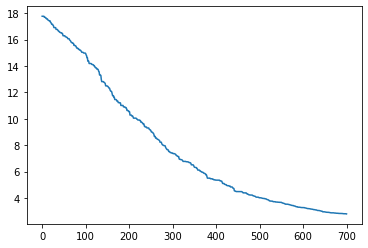

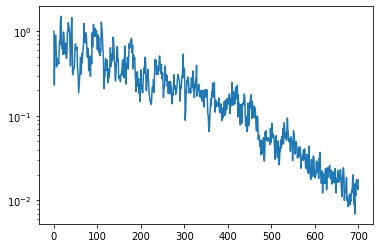

In [41]:
pops, fits, mrs, fits_mrs = optim.run_evolution_ours(pop, ackley, 700)
plt.plot(fits.min(dim=-1).values)
plt.show()
plt.plot(mrs[:, :, 0].log().mean(dim=-1).exp())
plt.yscale('log')

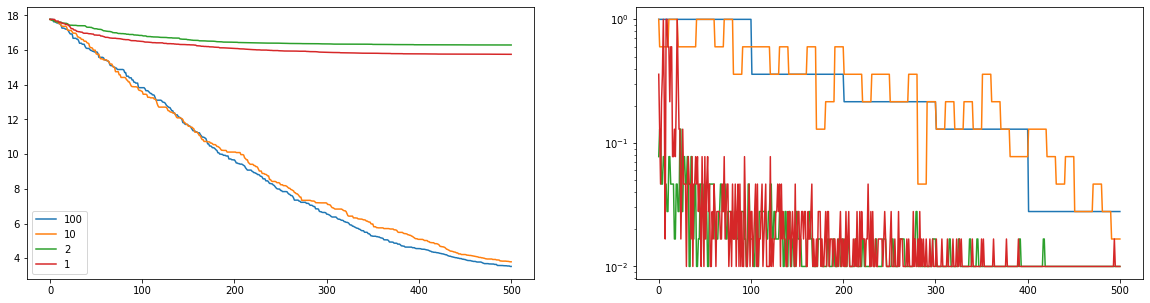

In [34]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(fits0.min(dim=-1).values, label='100')
plt.plot(fits1.min(dim=-1).values, label='10')
plt.plot(fits2.min(dim=-1).values, label='2')
plt.plot(fits3.min(dim=-1).values, label='1')
plt.legend()
plt.subplot(122)
plt.plot(mrs0, label='100')
plt.plot(mrs1, label='10')
plt.plot(mrs2, label='2')
plt.plot(mrs3, label='1')
plt.yscale('log')
plt.show()

In [43]:
mrs

torch.Size([100])

In [32]:
mrs0.shape

torch.Size([501])

long-term optimal MR vs short-term optimal MR vs GSMR

graph MR curves

In [115]:
mrs = torch.logspace(-2, 2.5, 32)
x = torch.randn(10000, 2)*10
x, xmut, fit_diff = get_mrs_fitness(x, mrs, ackley)
print(fit_diff.shape)
best_mrs = mrs[fit_diff.min(dim=-1).values.argsort()]
avg_min = fit_diff.reshape(32, 100, 100).min(dim=-1).values.mean(dim=-1)
only_min = fit_diff.min(dim=-1).values
avg = fit_diff.mean(dim=-1)

torch.Size([32, 10000])


In [116]:
f = []
for mr in tqdm(mrs):
    for seed in range(200):
        do_seed(seed)
        pop = torch.randn(101, 2)*10
        pops, fits = optim.run_evolution_base(pop, ackley, 1, mr)
        f.append(fits.min())
f = torch.stack(f).reshape(len(mrs), -1)

100%|██████████| 32/32 [00:07<00:00,  4.46it/s]


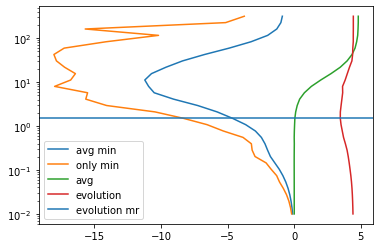

In [117]:
plt.plot(avg_min, mrs, label='avg min')
plt.plot(only_min, mrs, label='only min')
plt.plot(avg, mrs, label='avg')
plt.plot(f.mean(dim=-1), mrs, label='evolution')
plt.axhline(mrs[f.mean(dim=-1).argmin()], label='evolution mr')
plt.yscale('log')
plt.legend()

In [113]:
f = []
for mr in tqdm(mrs):
    for seed in range(20):
        do_seed(seed)
        pop = torch.randn(101, 2)*10
        pops, fits = optim.run_evolution_base(pop, ackley, 1, mr)
        f.append(fits.min())
f = torch.stack(f).reshape(len(mrs), -1)

100%|██████████| 32/32 [00:00<00:00, 34.46it/s]
